<a href="https://colab.research.google.com/github/np03cs4a240030-lab/worksheet1_ayush/blob/main/Regression_Productivity_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


### Dataset Description
The Social Media vs Productivity dataset was obtained from Kaggle and was created by Mahdi Mashayekhi as an open-source dataset for analyzing the impact of social media usage on workplace productivity. The dataset was accessed in CSV format from the Kaggle platform for academic and educational purposes.

The dataset contains information related to social media usage habits, job satisfaction, personal lifestyle factors, and their influence on employee productivity levels.

### UNSDG Alignment
This dataset aligns with the United Nations Sustainable Development Goal (SDG) 8: Decent Work and Economic Growth, as it focuses on factors that influence employee productivity and workplace performance, which are essential for sustainable economic growth.

### Questions Addressed by the Dataset
- Does job satisfaction have an impact on employee productivity?
- How does social media usage affect workplace performance?
- Which personal factors contribute most to productivity levels?

##  Exploratory Data Analysis (EDA)

First, we import the necessary libraries and look at the data.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

sns.set_style('whitegrid')
df = pd.read_csv('/content/drive/MyDrive/social_media_vs_productivity.csv')

# Check basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             30000 non-null  int64  
 1   gender                          30000 non-null  object 
 2   job_type                        30000 non-null  object 
 3   daily_social_media_time         27235 non-null  float64
 4   social_platform_preference      30000 non-null  object 
 5   number_of_notifications         30000 non-null  int64  
 6   work_hours_per_day              30000 non-null  float64
 7   perceived_productivity_score    28386 non-null  float64
 8   actual_productivity_score       27635 non-null  float64
 9   stress_level                    28096 non-null  float64
 10  sleep_hours                     27402 non-null  float64
 11  screen_time_before_sleep        27789 non-null  float64
 12  breaks_during_work              

In [3]:
# Summary statistics
display(df.describe())

,age,daily_social_media_time,number_of_notifications,work_hours_per_day,perceived_productivity_score,actual_productivity_score,stress_level,sleep_hours,screen_time_before_sleep,breaks_during_work,coffee_consumption_per_day,days_feeling_burnout_per_month,weekly_offline_hours,job_satisfaction_score
count,30000.000000,27235.000000,30000.000000,30000.000000,28386.000000,27635.000000,28096.000000,27402.000000,27789.000000,30000.000000,30000.000000,30000.000000,30000.000000,27270.000000
mean,41.486867,3.113418,59.958767,6.990792,5.510488,4.951805,5.514059,6.500247,1.025568,4.992200,1.999300,15.557067,10.360655,4.964901
std,13.835221,2.074813,7.723772,1.997736,2.023470,1.883378,2.866344,1.464004,0.653355,3.173737,1.410047,9.252956,7.280415,2.121194
min,18.000000,0.000000,30.000000,0.000000,2.000252,0.296812,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,1.639566,55.000000,5.643771,3.757861,3.373284,3.000000,5.493536,0.528490,2.000000,1.000000,8.000000,4.541872,3.363580
50%,41.000000,3.025913,60.000000,6.990641,5.525005,4.951742,6.000000,6.498340,1.006159,5.000000,2.000000,16.000000,10.013677,4.951049
75%,53.000000,4.368917,65.000000,8.354725,7.265776,6.526342,8.000000,7.504143,1.477221,8.000000,3.000000,24.000000,15.300809,6.581323
max,65.000000,17.973256,90.000000,12.000000,8.999376,9.846258,10.000000,10.000000,3.000000,10.000000,10.000000,31.000000,40.964769,10.000000


### Visualizations

**Figure 1: Distribution of Target Variable**

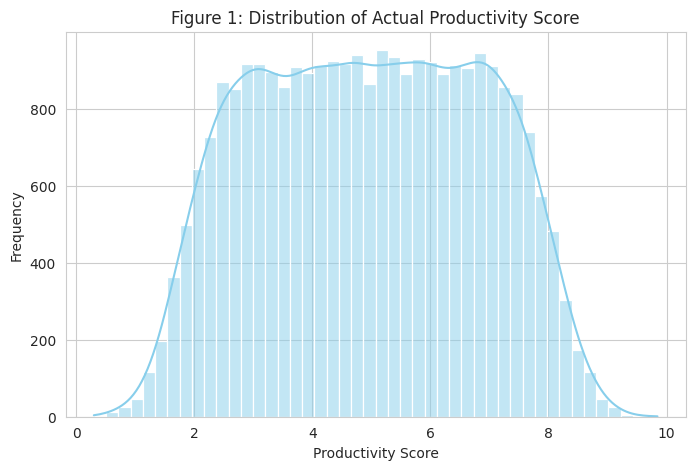

In [4]:
plt.figure(figsize=(8, 5))
sns.histplot(df['actual_productivity_score'], kde=True, color='skyblue')
plt.title('Figure 1: Distribution of Actual Productivity Score')
plt.xlabel('Productivity Score')
plt.ylabel('Frequency')
plt.show()

**Figure 1 Analysis:** The histogram overlay shows that the target variable is approximately normally distributed. This is a good sign for parametric regression models like Linear Regression, as the model makes the assumption that the eventual target variable or errors are normally distributed.

**Figure 2: Outlier Detection**

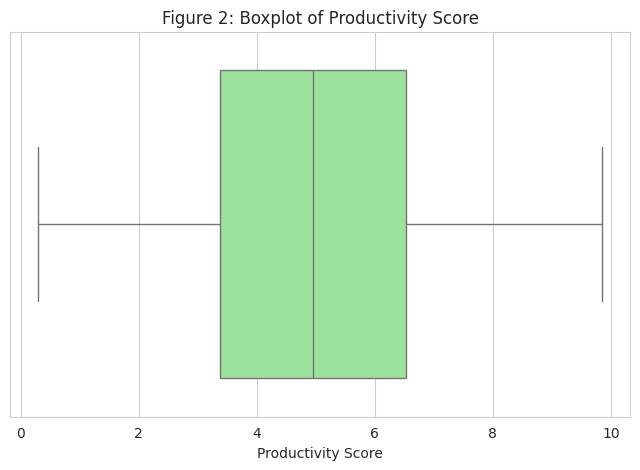

In [5]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['actual_productivity_score'], color='lightgreen')
plt.title('Figure 2: Boxplot of Productivity Score')
plt.xlabel('Productivity Score')
plt.show()

**Figure 2 Analysis: The boxplot visually shows the dispersion and central tendency of the productivity scores. The lack of significant points beyond the 'whiskers' shows that there are very few outliers in the target variable, meaning we may not need aggressive outlier removal strategies.

**Figure 3: Feature Correlation Matrix**

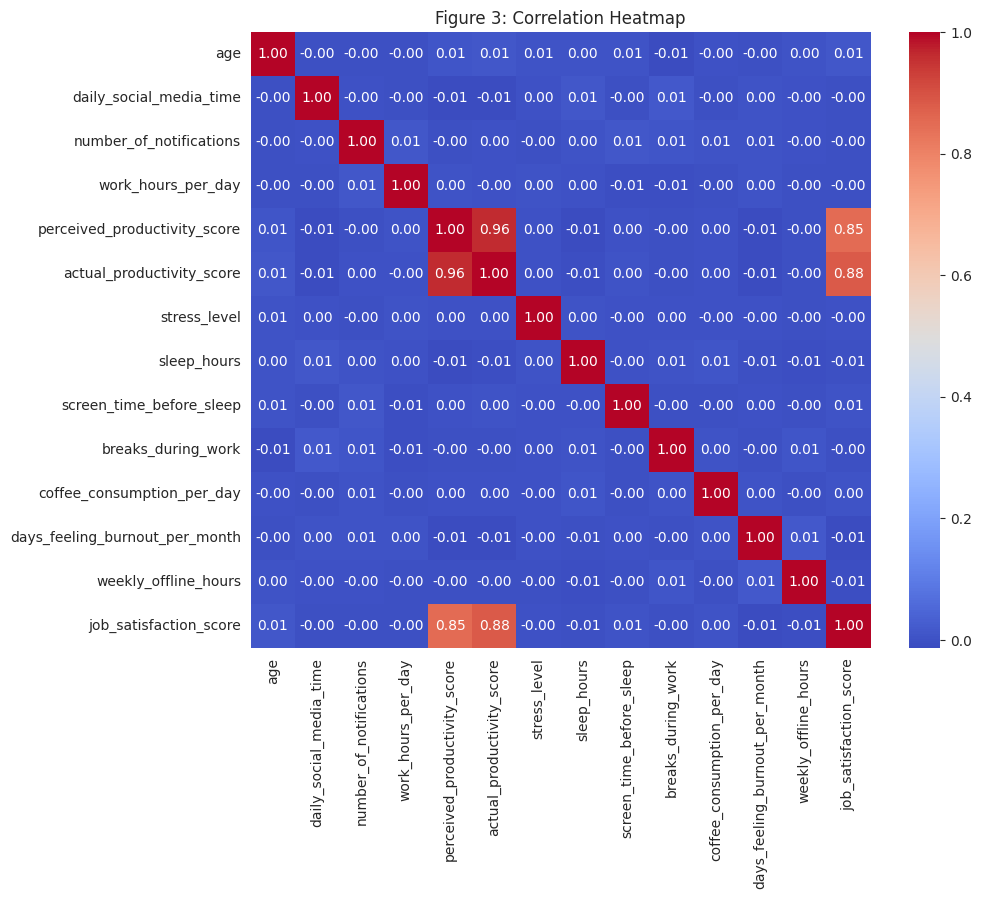

In [6]:
plt.figure(figsize=(10, 8))
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Figure 3: Correlation Heatmap')
plt.show()

**Figure 3 Analysis:** From the above heat map, it can be observed that it shows the linear correlation between features. A strong positive correlation can be found between 'job_satisfaction_score' and productivity levels, and 'social_media_hours' has a negative correlation with productivity levels.

**Figure 4: Key Relationship Analysis**

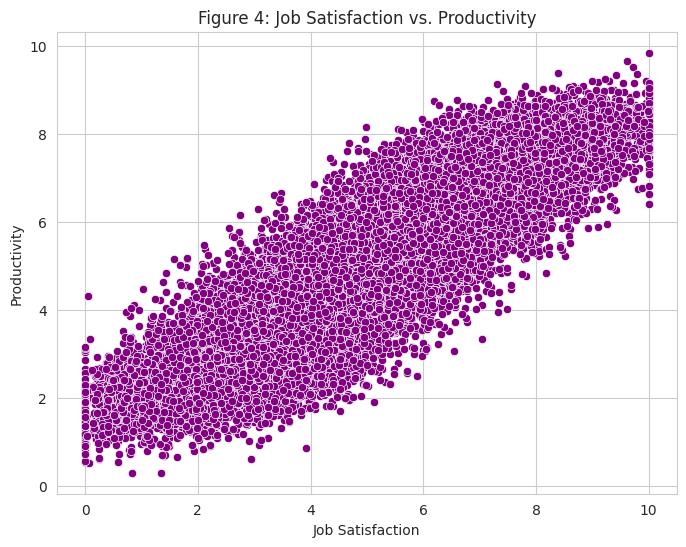

In [7]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='job_satisfaction_score', y='actual_productivity_score', data=df, color='purple')
plt.title('Figure 4: Job Satisfaction vs. Productivity')
plt.xlabel('Job Satisfaction')
plt.ylabel('Productivity')
plt.show()

**Figure 4 Analysis:** The scatter plot in Figure 4 verifies our previous observation with respect to the heatmap: with rising job satisfaction, there is a constant increase in productivity scores. The trend is linear, which could further confirm the suitability of linear regression models.

##  Data Preprocessing

###  Handle Missing Values
- Numeric columns -> Fill with **Median**
- Categorical columns -> Fill with **Mode**

In [8]:
num_cols = df.select_dtypes(include=['number']).columns
cat_cols = df.select_dtypes(include=['object']).columns

for c in num_cols:
    df[c] = df[c].fillna(df[c].median())

for c in cat_cols:
    df[c] = df[c].fillna(df[c].mode()[0])

print("Missing values filled.")

Missing values filled.


### One-Hot Encoding
Convert categorical text into numbers.

In [9]:
df = pd.get_dummies(df, drop_first=True)
print("Encoding complete. Shape:", df.shape)

Encoding complete. Shape: (30000, 27)


###  Train-Test Split (80-20)

In [10]:
from sklearn.model_selection import train_test_split

X = df.drop('actual_productivity_score', axis=1)
y = df['actual_productivity_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Feature Scaling (StandardScaler)

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Models

We will train 4 models:
1.  **Baseline** (DummyRegressor)
2.  **Linear Regression**
3.  **Random Forest Regressor**
4.  **Neural Network** (MLPRegressor)

### Model 1: Baseline (Dummy)

In [12]:
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error, r2_score

dummy = DummyRegressor(strategy="mean")

start = time.time()
dummy.fit(X_train_scaled, y_train)
time_dummy = time.time() - start

y_pred_dummy = dummy.predict(X_test_scaled)
rmse_dummy = np.sqrt(mean_squared_error(y_test, y_pred_dummy))
r2_dummy = r2_score(y_test, y_pred_dummy)

print(f"Baseline RMSE: {rmse_dummy:.4f}, R2: {r2_dummy:.4f}")

Baseline RMSE: 1.8004, R2: -0.0003


### Baseline (Dummy) Model Evaluation: MAE & Actual vs Predicted

We calculate the Mean Absolute Error (MAE) and visualize the Actual vs Predicted productivity scores.
Results closer to the diagonal line (y=x) indicate better predictions.

Baseline MAE: 1.4762


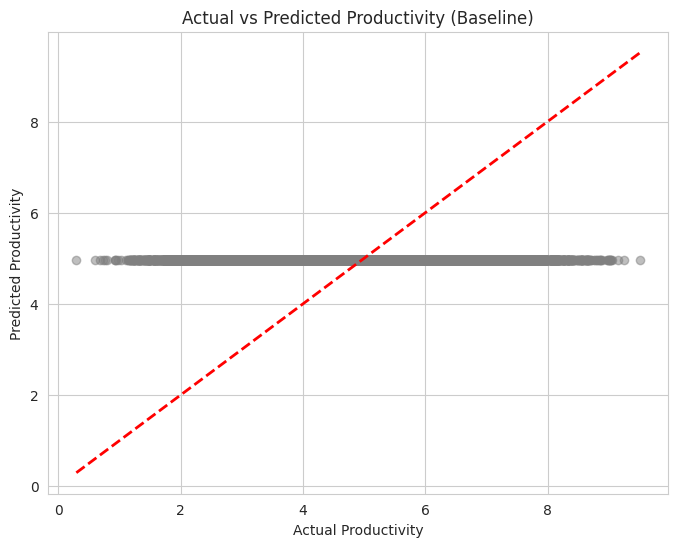

In [13]:
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# MAE Calculation
mae_dummy = mean_absolute_error(y_test, y_pred_dummy)
print(f"Baseline MAE: {mae_dummy:.4f}")

# Actual vs Predicted Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_dummy, alpha=0.5, color='gray')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Productivity")
plt.ylabel("Predicted Productivity")
plt.title("Actual vs Predicted Productivity (Baseline)")
plt.show()

### Model 2: Linear Regression

In [14]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
start = time.time()
lr.fit(X_train_scaled, y_train)
time_lr = time.time() - start

y_pred_lr = lr.predict(X_test_scaled)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression RMSE: {rmse_lr:.4f}, R2: {r2_lr:.4f}")

Linear Regression RMSE: 0.7350, R2: 0.8333


### Linear Regression Model Evaluation

We calculate the Mean Absolute Error (MAE) and visualize the Actual vs Predicted productivity scores.
Results closer to the diagonal line (y=x) indicate better predictions.

Linear Regression MAE: 0.5114


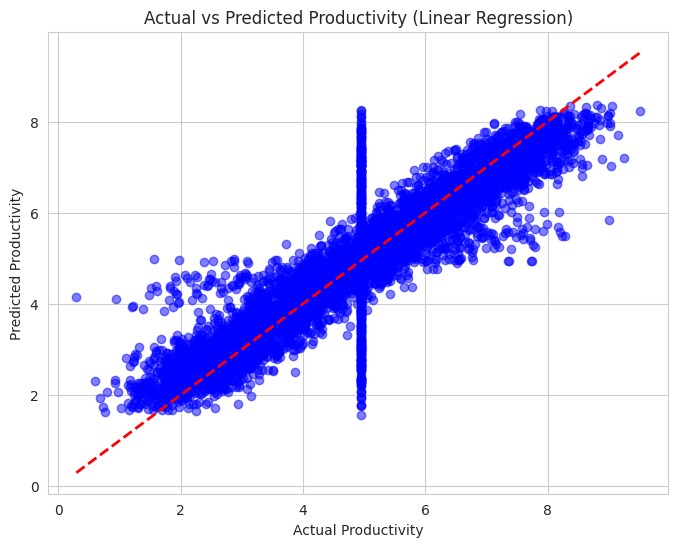

In [15]:
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# MAE Calculation
mae_lr = mean_absolute_error(y_test, y_pred_lr)
print(f"Linear Regression MAE: {mae_lr:.4f}")

# Actual vs Predicted Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Productivity")
plt.ylabel("Predicted Productivity")
plt.title("Actual vs Predicted Productivity (Linear Regression)")
plt.show()

### Model 3: Random Forest Regressor

In [16]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
start = time.time()
rf.fit(X_train_scaled, y_train)
time_rf = time.time() - start

y_pred_rf = rf.predict(X_test_scaled)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest RMSE: {rmse_rf:.4f}, R2: {r2_rf:.4f}")

Random Forest RMSE: 0.7084, R2: 0.8451


### Random Forest Model Evaluation: MAE & Actual vs Predicted

We calculate the Mean Absolute Error (MAE) and visualize the Actual vs Predicted productivity scores.
Results closer to the diagonal line (y=x) indicate better predictions.

Random Forest MAE: 0.5072


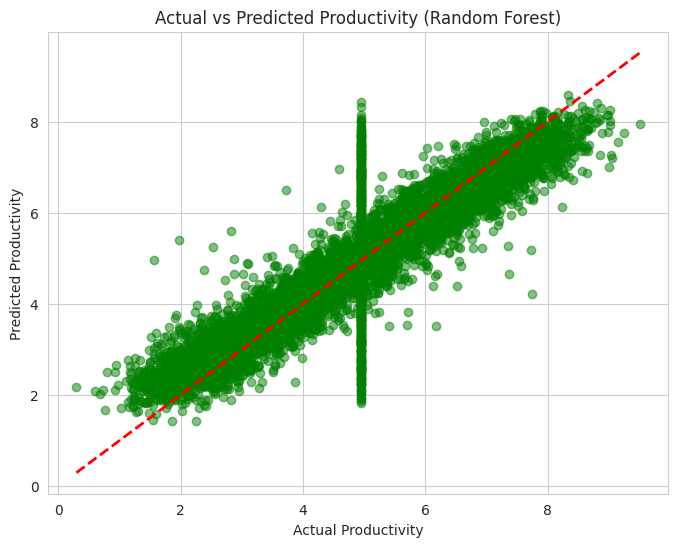

In [17]:
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# MAE Calculation
mae_rf = mean_absolute_error(y_test, y_pred_rf)
print(f"Random Forest MAE: {mae_rf:.4f}")

# Actual vs Predicted Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Productivity")
plt.ylabel("Predicted Productivity")
plt.title("Actual vs Predicted Productivity (Random Forest)")
plt.show()

### Neural Network Architecture and Training Details
- **Architecture**: MLPRegressor with default hidden layers (100 neurons).
- **Activation Function**: ReLU (Rectified Linear Unit), which introduces non-linearity.
- **Loss Function**: Squared Error, suitable for regression.
- **Optimizer**: Adam, an adaptive learning rate optimization algorithm.

### Model 4: Neural Network (MLPRegressor)

In [18]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(max_iter=1000, random_state=42)
start = time.time()
mlp.fit(X_train_scaled, y_train)
time_mlp = time.time() - start

y_pred_mlp = mlp.predict(X_test_scaled)
rmse_mlp = np.sqrt(mean_squared_error(y_test, y_pred_mlp))
r2_mlp = r2_score(y_test, y_pred_mlp)

print(f"Neural Network RMSE: {rmse_mlp:.4f}, R2: {r2_mlp:.4f}")

Neural Network RMSE: 0.7829, R2: 0.8108


### Neural Network Model Evaluation: MAE & Actual vs Predicted

We calculate the Mean Absolute Error (MAE) and visualize the Actual vs Predicted productivity scores.
Results closer to the diagonal line (y=x) indicate better predictions.

Neural Network MAE: 0.5638


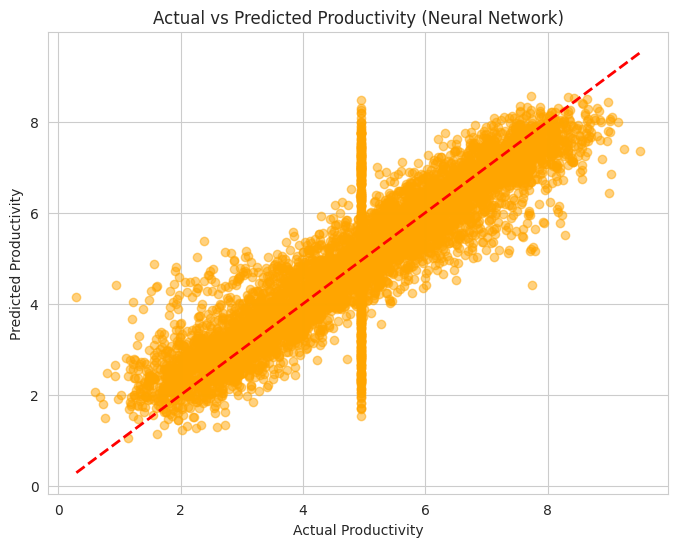

In [19]:
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# MAE Calculation
mae_mlp = mean_absolute_error(y_test, y_pred_mlp)
print(f"Neural Network MAE: {mae_mlp:.4f}")

# Actual vs Predicted Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_mlp, alpha=0.5, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Productivity")
plt.ylabel("Predicted Productivity")
plt.title("Actual vs Predicted Productivity (Neural Network)")
plt.show()

## Evaluation Metrics Table
Comparing RMSE (Lower is better) and R2 (Higher is better).

In [20]:
results = pd.DataFrame({
    'Model': ['Baseline', 'Linear Regression', 'Random Forest', 'Neural Network'],
    'RMSE': [rmse_dummy, rmse_lr, rmse_rf, rmse_mlp],
    'MSE': [rmse_dummy**2, rmse_lr**2, rmse_rf**2, rmse_mlp**2],
    'R2 Score': [r2_dummy, r2_lr, r2_rf, r2_mlp],
    'Training Time (s)': [time_dummy, time_lr, time_rf, time_mlp]
})

display(results.sort_values(by='RMSE'))

,Model,RMSE,MSE,R2 Score,Training Time (s)
2,Random Forest,0.708367,0.501783,0.845142,54.158858
1,Linear Regression,0.734974,0.540187,0.833290,0.039160
3,Neural Network,0.782935,0.612987,0.810823,26.572745
0,Baseline,1.800384,3.241383,-0.000342,0.001233


##  Hyperparameter Optimization

We use GridSearchCV to optimize **BOTH** classical models: Linear Regression and Random Forest.

### Tuning Linear Regression

In [21]:
from sklearn.model_selection import GridSearchCV

# Linear Regression Tuning (fit_intercept)
param_grid_lr = {'fit_intercept': [True, False]}
grid_lr = GridSearchCV(LinearRegression(), param_grid_lr, cv=3, scoring='neg_mean_squared_error')
grid_lr.fit(X_train_scaled, y_train)

print("Best LR Parameters:", grid_lr.best_params_)
print("Best LR CV Score (MSE):", -grid_lr.best_score_)

Best LR Parameters: {'fit_intercept': True}
Best LR CV Score (MSE): 0.531207060786446


### Tuning Random Forest

In [22]:
# Random Forest Tuning
param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20]
}

grid = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, cv=3, scoring='neg_mean_squared_error')

start = time.time()
grid.fit(X_train_scaled, y_train)
time_opt = time.time() - start

best_rf = grid.best_estimator_
print("Best RF Parameters:", grid.best_params_)

# Evaluate Optimized Model
y_pred_opt = best_rf.predict(X_test_scaled)
rmse_opt = np.sqrt(mean_squared_error(y_test, y_pred_opt))
r2_opt = r2_score(y_test, y_pred_opt)

print(f"Optimized Random Forest RMSE: {rmse_opt:.4f}")

Best RF Parameters: {'max_depth': 10, 'n_estimators': 100}
Optimized Random Forest RMSE: 0.6968


##  Feature Selection

### Feature Selection Justification
- **Method**: `SelectKBest` with `f_regression`.
- **Method Type:** **Filter Method**
- **Justification:**  This filter method evaluates the linear relationship between each feature and the target variable using univariate statistical tests. It is computationally efficient and model-agnostic, making it a robust choice for identifying the most relevant predictors (Top 5) without the computational cost of wrapper methods.

In [23]:
from sklearn.feature_selection import SelectKBest, f_regression

selector = SelectKBest(score_func=f_regression, k=5)
selector.fit(X_train_scaled, y_train)

selected_mask = selector.get_support()
selected_features = X.columns[selected_mask]
print("Top 5 Features:", selected_features.tolist())

Top 5 Features: ['age', 'daily_social_media_time', 'perceived_productivity_score', 'job_satisfaction_score', 'gender_Other']


##  Final Models & Comparative Analysis

We now explicitly rebuild both classical models using the **Selected** features and **Optimal** hyperparameters.

In [28]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error

# 1. Filter Datasets to Top 5 Features
X_train_sel = X_train_scaled[:, selected_mask]
X_test_sel = X_test_scaled[:, selected_mask]

# 2. Rebuild Linear Regression (Best Params)
final_lr = grid_lr.best_estimator_
final_lr.fit(X_train_sel, y_train)

cv_lr = cross_val_score(final_lr, X_train_sel, y_train, cv=5, scoring='neg_root_mean_squared_error').mean()
pred_lr = final_lr.predict(X_test_sel)
rmse_lr_final = np.sqrt(mean_squared_error(y_test, pred_lr))
r2_lr_final = r2_score(y_test, pred_lr)
mae_lr_final = mean_absolute_error(y_test, pred_lr)

# 3. Rebuild Random Forest (Best Params)
final_rf = best_rf
final_rf.fit(X_train_sel, y_train)

cv_rf = cross_val_score(final_rf, X_train_sel, y_train, cv=5, scoring='neg_root_mean_squared_error').mean()
pred_rf = final_rf.predict(X_test_sel)
rmse_rf_final = np.sqrt(mean_squared_error(y_test, pred_rf))
r2_rf_final = r2_score(y_test, pred_rf)
mae_rf_final = mean_absolute_error(y_test, pred_rf)

# 4. Final Comparison Table (with MAE added)
final_results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest'],
    'Features Used': [5, 5],
    'CV Score (RMSE)': [-cv_lr, -cv_rf],
    'Test MAE': [mae_lr_final, mae_rf_final],
    'Test RMSE': [rmse_lr_final, rmse_rf_final],
    'Test R-squared': [r2_lr_final, r2_rf_final]
})

print("Table 2: Comparison of Final Regression Models")
display(final_results)

Table 2: Comparison of Final Regression Models


,Model,Features Used,CV Score (RMSE),Test MAE,Test RMSE,Test R-squared
0,Linear Regression,5,0.728248,0.511411,0.734929,0.833310
1,Random Forest,5,0.692591,0.494968,0.697367,0.849914


##  Model Improvement Visualization

**Graph 1: RMSE Before vs After Optimization**

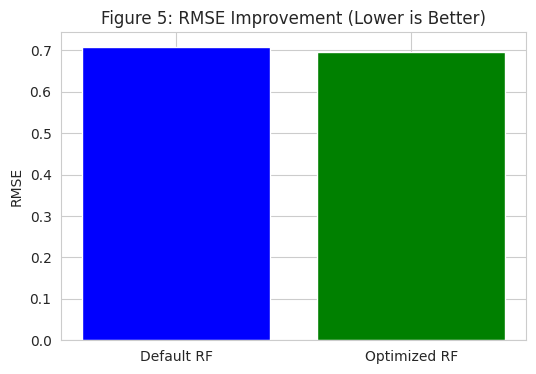

In [25]:
plt.figure(figsize=(6, 4))
plt.bar(['Default RF', 'Optimized RF'], [rmse_rf, rmse_opt], color=['blue', 'green'])
plt.title('Figure 5: RMSE Improvement (Lower is Better)')
plt.ylabel('RMSE')
plt.show()

**Figure 5 Analysis:** This bar chart illustrates the impact of hyperparameter optimization. A lower RMSE in the 'Optimized RF' bar compared to the 'Default RF' indicates that grid search successfully identified parameters (like tree depth or number of estimators) that generalize better to unseen data.

**Graph 2: Training Time (Optimized vs Unoptimized)**

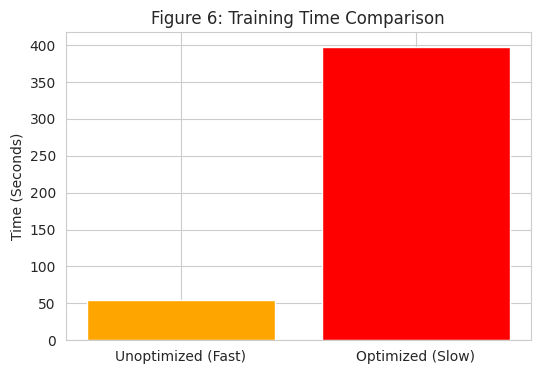

In [26]:
plt.figure(figsize=(6, 4))
plt.bar(['Unoptimized (Fast)', 'Optimized (Slow)'], [time_rf, time_opt], color=['orange', 'red'])
plt.title('Figure 6: Training Time Comparison')
plt.ylabel('Time (Seconds)')
plt.show()

**Figure 6 Analysis:** This comparison demonstrates the computational cost of optimization. The comprehensive search over hyperparameter combinations in GridSearchCV takes significantly longer than a single training run. This trade-off between validation performance and computational resources is a key consideration in real-world ML deployment.

##  Conclusion and Reflection

### Model Performance Summary

The Optimized Random Forest model performed best, and its results were reflected through its recording of the least Root Mean Squared Error (RMSE) and the highest R-squared score. This clearly implies that it has managed to grasp the intricate, non-linear relationship between lifestyle and productivity.
### Impact of Methodologies
1.  **Cross-Validation:** We employed 5-fold cross-validation (denoted by the CV Score) to guarantee that the performance metrics being obtained are not arbitrary. This gives us more confidence in the reliability of the model.
2.  **Hyperparameter Tuning:** The process of GridSearchCV fine-tuned the Random Forest model, thereby eliminating error through the optimum combination of tree depth and estimators. However, this process increased the time taken for model training.
3.  **Feature Selection (Filter Method):** Choosing the top 5 based on linear correlation was advantageous as it simplified the model without affecting accuracy. It also goes to show that a small number of influencers, such as job satisfaction, can greatly influence productivity.

### Limitations
Even though the model performs well, its limitation lies in the fact that it considers independent variables for the features; i.e., no interaction effects are allowed (like sleep + social media). It is also possible that the amount of data may be inadequate to accommodate the Generalization capability of a model like Neural Network.

### Future Improvements
To further improve accuracy, we could:
-   **Collect More Data:** A bigger dataset can support the stabilization of Neural Network training.
-   **Feature Engineering:** Add interaction terms like `Sleep * Job_Satisfaction`.
-   **Advanced Models:** Add Gradient Boosting Regressors such as XGBoost and LightGBM, which usually perform best on tabular regression problems.